<a href="https://colab.research.google.com/github/nishthachib/CareerHub2020.github.io/blob/master/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tweepy

In [2]:
pip install pandas

In [3]:
import pandas as pd 
import tweepy 

In [11]:
def printtweetdata(n, ith_tweet): 
    print() 
    print(f"Tweet {n}:")
    print(f"Tweet Text:{ith_tweet[0]}") 

In [19]:
# function to perform data extraction 
def scrape(words, date_since, numtweet): 
      
    # Creating DataFrame using pandas 
    db = pd.DataFrame(columns=[ 'tweets_written']) 
      
    # We are using .Cursor() to search through twitter for the required tweets. 
    # The number of tweets can be restricted using .items(number of tweets) 
    tweets = tweepy.Cursor(api.search, q=words, lang="en", 
                           since=date_since, tweet_mode='extended').items(numtweet) 
     
    # .Cursor() returns an iterable object. Each item in  
    # the iterator has various attributes that you can access to  
    # get information about each tweet 
    list_tweets = [tweet for tweet in tweets] 
      
    # Counter to maintain Tweet Count 
    i = 1  
      
    # we will iterate over each tweet in the list for extracting information about each tweet 
    for tweet in list_tweets:          
        try: 
            text = tweet.retweeted_status.full_text 
            
        except AttributeError: 
            text = tweet.full_text 
        hashtext = list() 
        
        # Here we are appending all the extracted information in the DataFrame 
        ith_tweet = [text] 
        db.loc[len(db)] = ith_tweet 
          
        # Function call to print tweet data on screen 
        printtweetdata(i, ith_tweet) 
        i = i+1
    filename = '/content/gdrive/My Drive/pythonfiles/scraped_tweets.csv'
      
    # we will save our database as a CSV file. 
    db.to_csv(filename) 
   
  
  
if __name__ == '__main__': 
      
    # Enter your own credentials obtained  
    # from your developer account 
    consumer_key = "A3TkwqZTsXLv38dzRxbe5vtVF"
    consumer_secret = "LhTD0SKdquiPySraCLXXcWIrVxETtwzW3Lvx5CyoMjk1o4c2pj"
    access_key = "1142707594999427072-2vPPWCgt7XBP9vn6jPVb04viwuaEfW"
    access_secret = "Lhq0kQP6kghc3FInq0JSnUAVTm0sD8YDRA1Ug44Pzd2sC"
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
    auth.set_access_token(access_key, access_secret) 
    api = tweepy.API(auth) 
      
    # Enter Hashtag and initial date 
    print("Enter Twitter HashTag to search for") 
    words = input() 
    print("Enter Date since The Tweets are required in yyyy-mm--dd") 
    date_since = input() 
      
    # number of tweets you want to extract in one run 
    numtweet = 1000
    scrape(words, date_since, numtweet) 
    print('Scraping has completed!') 


Streaming output truncated to the last 5000 lines.

#Zomato

Tweet 125:
Tweet Text:As per PREVAILING LAW #ZOMATO ALSO RESPONSIBLE AS A PRINCIPAL ORGANIZATION FOR ACTIVITIES  OF THEIR EMPLOYEES. ..LAW OF AGENCY AGREEMENT... https://t.co/WYJbxWf8vj

Tweet 126:
Tweet Text:Why has #HiteshaChandranee deleted her tweet on #ZomatoDeliveryGuy? Her Instagram comments have also been restricted

Social Media allegations can't be one way ma'am - &amp; Now please do not play victim card of 'internet bullying'

#Zomato #ZomatoDeliveryBoy #Kamaraj #MenToo https://t.co/iQoznh1X9K https://t.co/eJZ23wp9r4

Tweet 127:
Tweet Text:So, food delivery is time-bound but justice is not? If the delivery man's version is found to be true, strict action must be taken for mischaractarization. 

I hope justice is delivered swiftly too. 
#ZomatoDeliveryGuy #JusticeForKamaraj #Zomato https://t.co/IpqxiEOCFO

Tweet 128:
Tweet Text:#ReinstateKamaraj!
The guy lost his job &amp; pride due to an arrogant influencer who see

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [20]:
tweets_file = pd.read_csv('/content/gdrive/My Drive/pythonfiles/scraped_tweets.csv')

In [21]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt  

In [22]:

import numpy as np
import re
# remove twitter handles (@user)
tweets_file['tidy_tweet'] = np.vectorize(remove_pattern)(tweets_file['tweets_written'], "@[\w]*")



In [23]:
# remove special characters, numbers, punctuations
tweets_file['tidy_tweet'] = tweets_file['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

In [24]:
tweets_file['tidy_tweet'] = tweets_file['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))


In [25]:
tokenized_tweet = tweets_file['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [#ReinstateKamaraj, lost, pride, arrogant, inf...
1    [have, come, across, this, official, response,...
2    [food, delivery, time, bound, justice, deliver...
3    [days, after, Bengaluru, woman, alleged, attac...
4    [Email, sent, management, asking, some, pertin...
Name: tidy_tweet, dtype: object

In [26]:
import string
import nltk
from nltk.stem.porter import *

In [27]:
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [#reinstatekamaraj, lost, pride, arrog, influe...
1    [have, come, across, thi, offici, respons, fro...
2    [food, deliveri, time, bound, justic, deliveri...
3    [day, after, bengaluru, woman, alleg, attack, ...
4    [email, sent, manag, ask, some, pertin, questi...
Name: tidy_tweet, dtype: object

In [28]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

tweets_file['tidy_tweet'] = tokenized_tweet

In [29]:
tweets_file['tidy_tweet']

0      #reinstatekamaraj lost pride arrog influenc se...
1      have come across thi offici respons from hope ...
2      food deliveri time bound justic deliveri versi...
3      day after bengaluru woman alleg attack #zomato...
4      email sent manag ask some pertin question make...
                             ...                        
995    #reinstatekamaraj lost pride arrog influenc se...
996    #reinstatekamaraj lost pride arrog influenc se...
997    main culprit #zomato thi case they claim offer...
998    either ring nail hurt nose definit punch futur...
999    food deliveri time bound justic deliveri versi...
Name: tidy_tweet, Length: 1000, dtype: object

In [30]:
df = pd.DataFrame(tweets_file['tidy_tweet']) 

In [31]:
df

,tidy_tweet
0,#reinstatekamaraj lost pride arrog influenc se...
1,have come across thi offici respons from hope ...
2,food deliveri time bound justic deliveri versi...
3,day after bengaluru woman alleg attack #zomato...
4,email sent manag ask some pertin question make...
...,...
995,#reinstatekamaraj lost pride arrog influenc se...
996,#reinstatekamaraj lost pride arrog influenc se...
997,main culprit #zomato thi case they claim offer...
998,either ring nail hurt nose definit punch futur...


In [32]:
df.to_csv('/content/gdrive/My Drive/pythonfiles/tidy_tweet.csv')

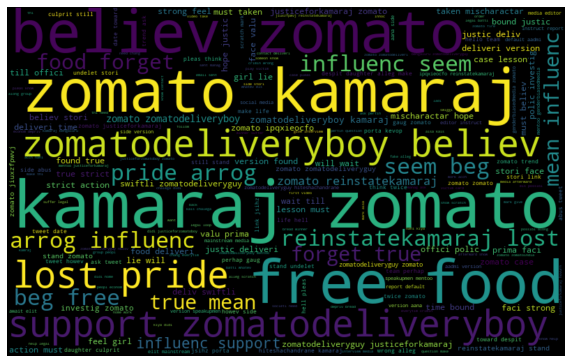

In [33]:
import matplotlib.pyplot as plt
all_words = ' '.join([text for text in tweets_file['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()